<a href="https://colab.research.google.com/github/AmalaRaju/DDDS-Projects/blob/main/Salary_prediction_project_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection/Sources

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv("https://data.montgomerycountymd.gov/api/views/48wg-fkab/rows.csv?accessType=DOWNLOAD")
df.head()

,Position Title,Position Class Code,Grade,Average of Base Salary,Number of Employees
0,Information Technology Expert,550,32,"$146,925.34",9
1,Accountant/Auditor II,210,21,"$82,742.44",2
2,Veterinary Assistant,206513,15,"$45,925.44",2
3,Police Aide,3506,15,"$58,628.63",15
4,ERP Functional Business Analyst,100546,30,"$133,797.25",3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Position Title          321 non-null    object
 1   Position Class Code     321 non-null    int64 
 2   Grade                   321 non-null    object
 3   Average of Base Salary  321 non-null    object
 4   Number of Employees     321 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 12.7+ KB


In [ ]:
# Clean the salary column by removing "$" and "," and converting to float
df['Average of Base Salary'] = df['Average of Base Salary'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.head()

,Position Title,Position Class Code,Grade,Average of Base Salary,Number of Employees
0,Information Technology Expert,550,32,146925.34,9
1,Accountant/Auditor II,210,21,82742.44,2
2,Veterinary Assistant,206513,15,45925.44,2
3,Police Aide,3506,15,58628.63,15
4,ERP Functional Business Analyst,100546,30,133797.25,3


## Data Cleaning

Let's check if there is null value in any of the columns.

In [ ]:
df.isnull().sum()

,0
Position Title,0
Position Class Code,0
Grade,0
Average of Base Salary,0
Number of Employees,0


Since there is no null value,let's check the unique value in grade column and position title columns.

In [ ]:
df['Grade'].value_counts()

,count
Grade,
21,26
18,26
23,23
20,23
25,19
19,19
24,18
16,17
26,16


In [ ]:
df['Position Title'].value_counts()

,count
Position Title,
Correctional Specialist IV,1
Urban District Public Service and Maintenance Team Supervisor,1
Legislative Analyst III,1
Facilities and Equipment Maintenance Coordinator,1
Senior Planning Specialist,1
...,...
Alcohol Beverage Purchasing and Account Specialist,1
ERP Functional Business Analyst,1
Police Aide,1


It looks like position title column is a unique column and is not helpful.

In [ ]:
grade_counts =df.groupby(['Position Title','Grade']).size().reset_index(name='Count')
grade_counts.sort_values(by='Grade')
print(grade_counts)

                                    Position Title Grade  Count
0    Abandoned Vehicle Code Enforcement Specialist    16      1
1                             Accountant/Auditor I    18      1
2                            Accountant/Auditor II    21      1
3                           Accountant/Auditor III    23      1
4                    Accountant/Auditor Supervisor    26      1
..                                             ...   ...    ...
316                                         Welder    18      1
317                            Work Force Leader I    13      1
318                           Work Force Leader II    18      1
319                          Work Force Leader III    19      1
320                           Work Force Leader IV    21      1

[321 rows x 3 columns]


From the above,it's clear that each position is assigned a grade and few different positions are having the same grade.

In [ ]:
df_cleaned=df.copy()

In [ ]:
# Convert the Grade column to string first (just in case)
df_cleaned['Grade'] = df_cleaned['Grade'].astype(str)

In [ ]:
# Create a new column for numeric grades
df_cleaned['Grade_numeric'] = pd.to_numeric(df_cleaned['Grade'], errors='coerce')  # Non-numeric becomes NaN

In [ ]:
df_cleaned['Grade_numeric'].value_counts()

,count
Grade_numeric,
21.0,26
18.0,26
23.0,23
20.0,23
25.0,19
19.0,19
24.0,18
16.0,17
26.0,16


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position Title          321 non-null    object 
 1   Position Class Code     321 non-null    int64  
 2   Grade                   321 non-null    object 
 3   Average of Base Salary  321 non-null    float64
 4   Number of Employees     321 non-null    int64  
 5   Grade_numeric           292 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 15.2+ KB


In [ ]:
# Now create a new column to handle special alphanumeric grades
df_cleaned['Grade_special'] = df_cleaned['Grade'].where(df_cleaned['Grade_numeric'].isna(), None)

In [ ]:
df_cleaned.head()

,Position Title,Position Class Code,Grade,Average of Base Salary,Number of Employees,Grade_numeric,Grade_special
0,Information Technology Expert,550,32,146925.34,9,32.0,None
1,Accountant/Auditor II,210,21,82742.44,2,21.0,None
2,Veterinary Assistant,206513,15,45925.44,2,15.0,None
3,Police Aide,3506,15,58628.63,15,15.0,None
4,ERP Functional Business Analyst,100546,30,133797.25,3,30.0,None


In [ ]:
df_cleaned['Grade_special'].value_counts()

,count
Grade_special,
M1,1
C2,1
D1,1
M2,1
P1,1
G1,1
D2,1
A1,1
C1,1


In [ ]:
#Encode Numeric Grades as Integers
df_cleaned['Grade_numeric'] = df_cleaned['Grade_numeric'].astype('Int64')

In [ ]:
#apply one-hot encoding to non-numeric special codes
grade_special_dummies = pd.get_dummies(df_cleaned['Grade_special'], prefix='Grade')
df_cleaned = pd.concat([df_cleaned, grade_special_dummies], axis=1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position Title          321 non-null    object 
 1   Position Class Code     321 non-null    int64  
 2   Grade                   321 non-null    object 
 3   Average of Base Salary  321 non-null    float64
 4   Number of Employees     321 non-null    int64  
 5   Grade_numeric           292 non-null    Int64  
 6   Grade_special           29 non-null     object 
 7   Grade_A1                321 non-null    bool   
 8   Grade_A2                321 non-null    bool   
 9   Grade_A3                321 non-null    bool   
 10  Grade_B1                321 non-null    bool   
 11  Grade_B2                321 non-null    bool   
 12  Grade_B3                321 non-null    bool   
 13  Grade_B4                321 non-null    bool   
 14  Grade_B6                321 non-null    bo

In [ ]:
nulls = df_cleaned[df_cleaned['Grade_numeric'].isna()]
print(nulls)

                                Position Title  Position Class Code Grade  \
9                                    Manager I                  110    M1   
19          Correctional Team Leader - Captain                 3233    C2   
26                     Deputy Sheriff Sergeant                 3528    D1   
28                                  Manager II                  111    M2   
30                    Police Officer Candidate                 3086    P1   
40                    Deputy Sheriff Candidate                 3532    G1   
66                   Deputy Sheriff Lieutenant                 3527    D2   
75                             Police Sergeant                 3067    A1   
84   Correctional Shift Commander - Lieutenant                 3235    C1   
104                          Police Lieutenant                 3065    A2   
117                      Public Health Dentist               120003   MD2   
129                     Deputy Sheriff Captain                 3525    D3   

Let's introduce a fake grade level for the nulls in grade numeric since we have already encoded special grades separately.

In [ ]:
df_cleaned['Grade_numeric'] = df_cleaned['Grade_numeric'].fillna(-1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position Title          321 non-null    object 
 1   Position Class Code     321 non-null    int64  
 2   Grade                   321 non-null    object 
 3   Average of Base Salary  321 non-null    float64
 4   Number of Employees     321 non-null    int64  
 5   Grade_numeric           321 non-null    Int64  
 6   Grade_special           29 non-null     object 
 7   Grade_A1                321 non-null    bool   
 8   Grade_A2                321 non-null    bool   
 9   Grade_A3                321 non-null    bool   
 10  Grade_B1                321 non-null    bool   
 11  Grade_B2                321 non-null    bool   
 12  Grade_B3                321 non-null    bool   
 13  Grade_B4                321 non-null    bool   
 14  Grade_B6                321 non-null    bo

In [ ]:
#Creating a backup
dfcleaned_copy=df_cleaned.copy()

In [ ]:
# Let's drop original 'Grade' and 'Grade_special' along with Position Title column which is a unique column
df_cleaned.drop(['Grade', 'Grade_special','Position Title'], axis=1, inplace=True)

In [ ]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=['Average of Base Salary'])
y = df_cleaned['Average of Base Salary']

# normalize the features
scaler = StandardScaler()
scaler.fit_transform(X)



array([[-0.40105907, -0.2075952 ,  1.69875855, ..., -0.0559017 ,
        -0.0559017 , -0.0559017 ],
       [-0.40781322, -0.30962197,  0.32394387, ..., -0.0559017 ,
        -0.0559017 , -0.0559017 ],
       [ 3.69043129, -0.30962197, -0.42595504, ..., -0.0559017 ,
        -0.0559017 , -0.0559017 ],
       ...,
       [-0.34188072,  0.62319424, -2.42568548, ..., -0.0559017 ,
        -0.0559017 , -0.0559017 ],
       [-0.40976001,  3.33419135, -2.42568548, ..., -0.0559017 ,
        -0.0559017 , -0.0559017 ],
       [-0.3474827 , -0.28047146,  0.82387648, ..., -0.0559017 ,
        -0.0559017 , -0.0559017 ]])

Mean Squared Error: $1,949,052,061.65
R^2 Score: -1.80


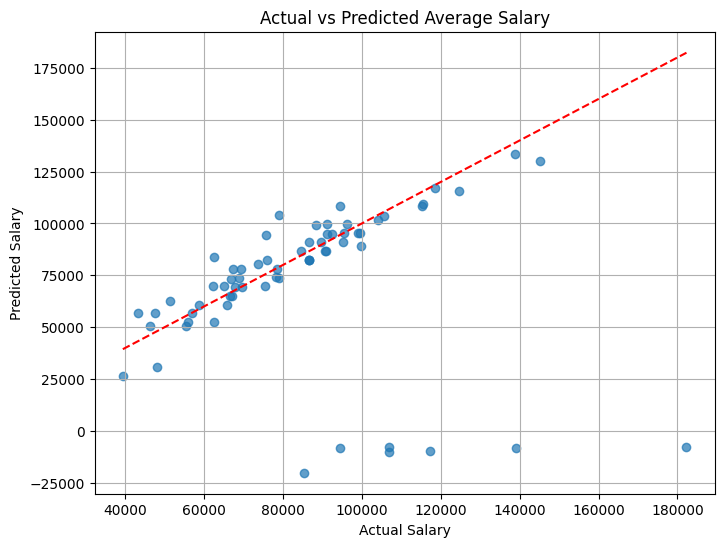

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit a linear regression model
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

# Make predictions
y_pred = my_fit_lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: ${mse:,.2f}")
print(f"R^2 Score: {r2:.2f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Average Salary")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()